In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset

df = pd.read_csv('data.csv')

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [4]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [11]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

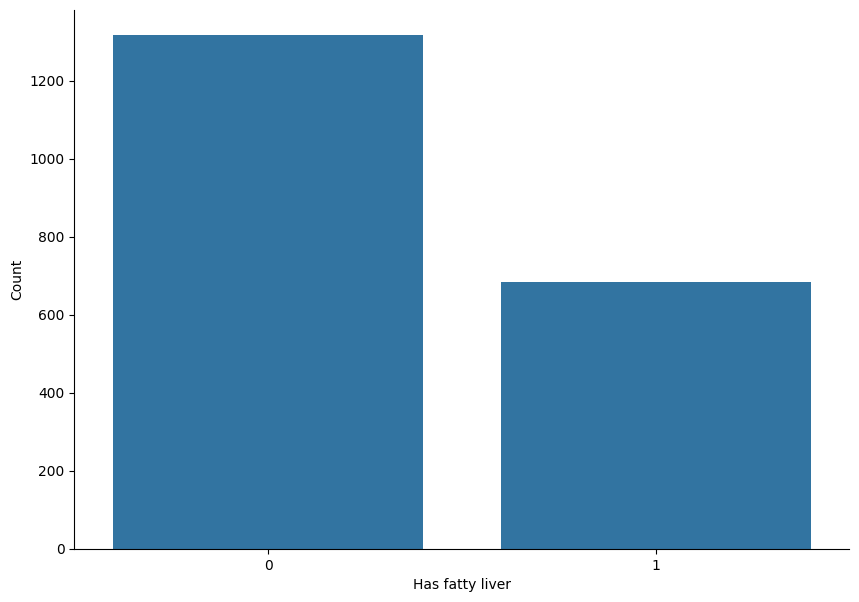

In [12]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has fatty liver')
plt.ylabel('Count')

plt.show()

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

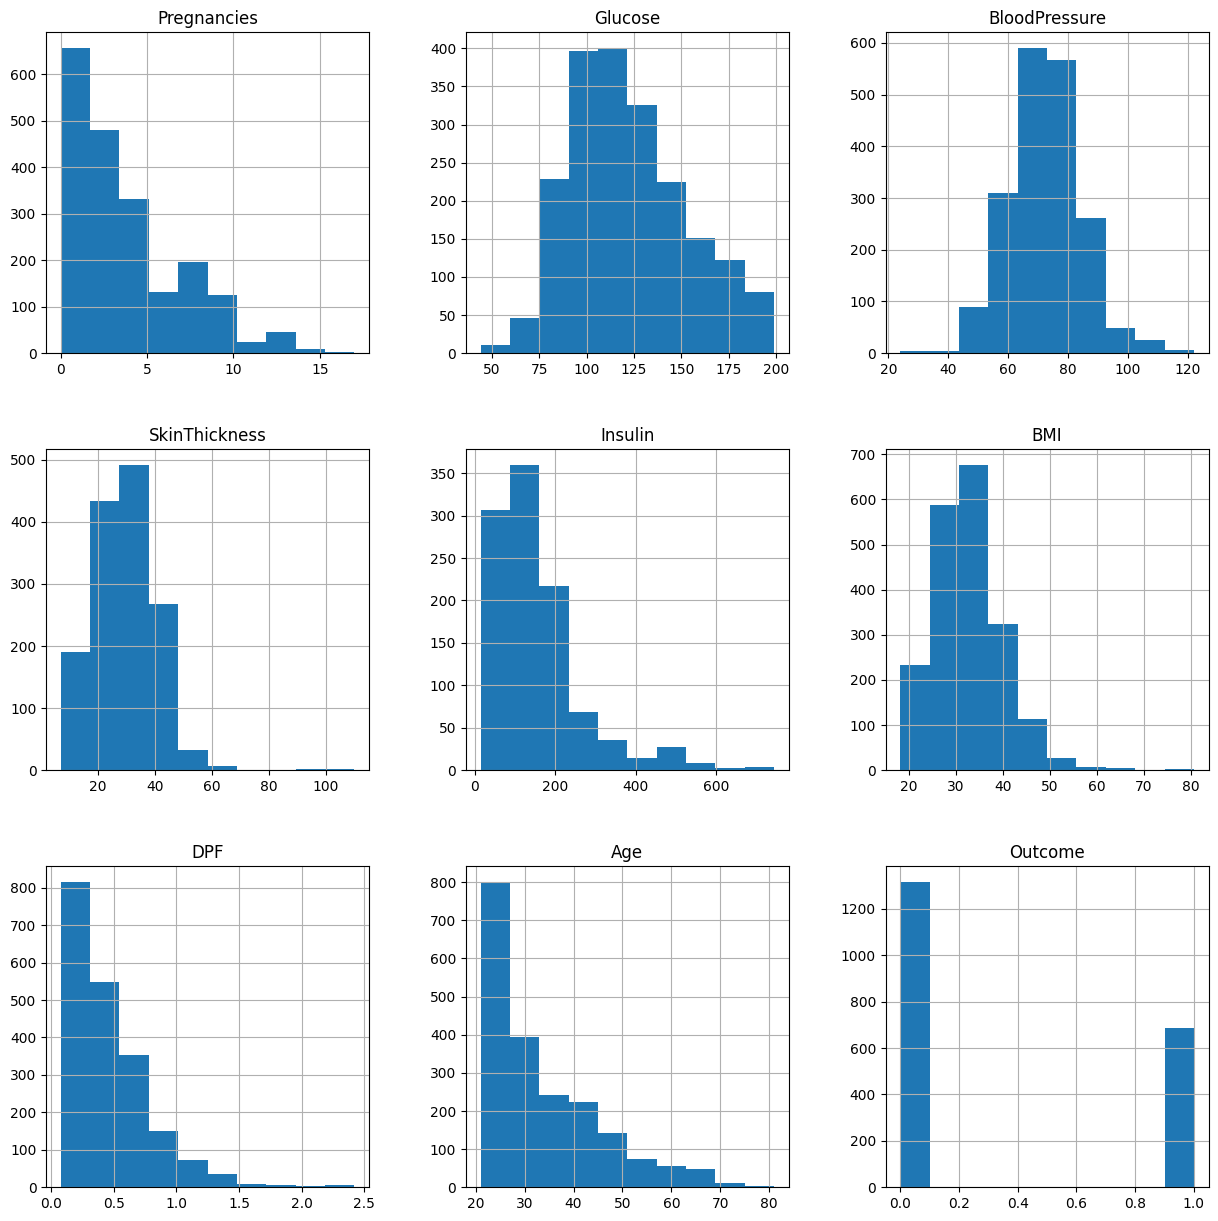

In [14]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [15]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
####################################################################
# fill other nan features with statistical operations to get good results
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)
####################################################################

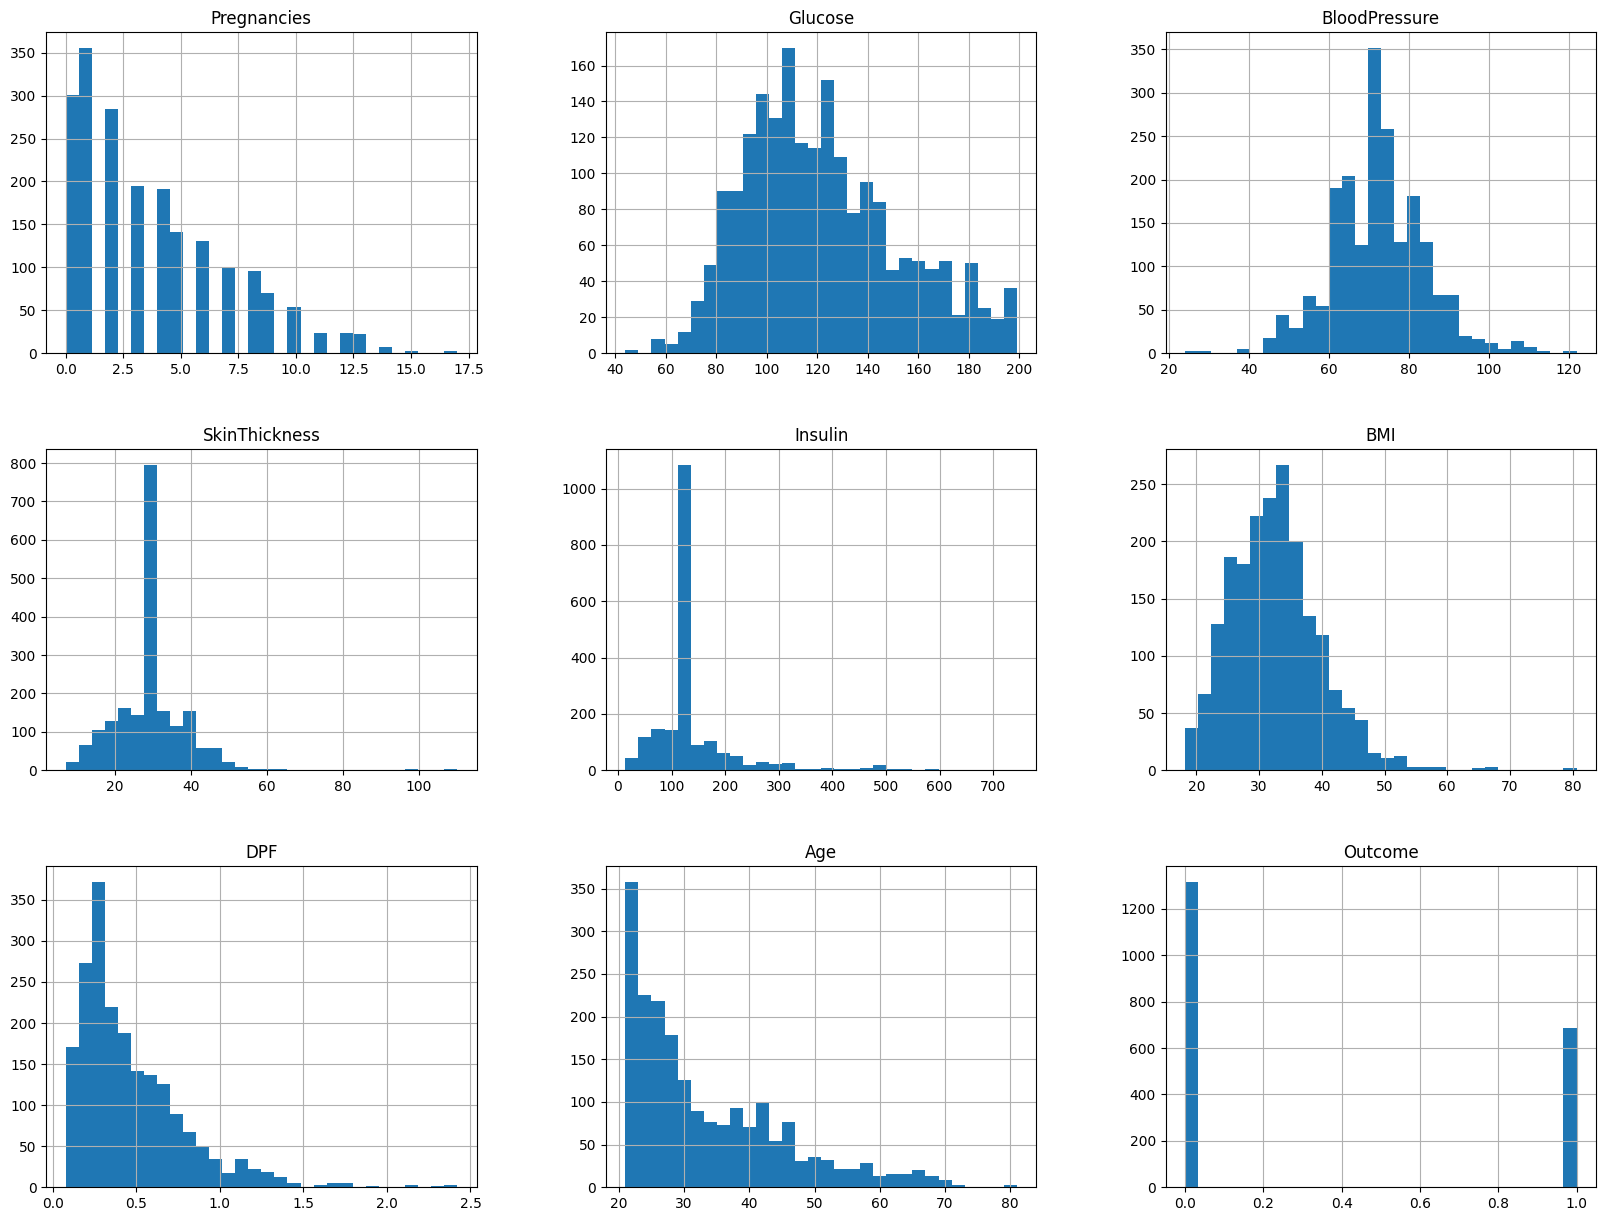

In [16]:
####################################################################
# Plotting histogram of dataset after replacing NaN values
df_copy.hist(bins=30, figsize=(20, 15))
plt.show()
####################################################################

In [17]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [18]:
# split and standard the data in this place
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [19]:
##############################################################
#create nueral network model in kears/tensorflow in this place
##############################################################


# Separate features (X) and labels (y)
# جدا کردن ویژگی‌ها (X) و برچسب‌ها (y)

X = df.drop(columns=['Outcome'])  #   'Outcome' is the target column
y = df['Outcome']



# Split the data into 80% training and 20% testing
# تقسیم داده‌ها به نسبت 80% آموزش و 20% تست

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardize the data using StandardScaler
# استانداردسازی داده‌ها با استفاده از StandardScaler

#scaler = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



###

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Design the neural network model
# طراحی مدل شبکه عصبی
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # اضافه کردن لایه Dropout با نرخ 50%        
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # اضافه کردن لایه Dropout با نرخ 50%        
model.add(Dense(1, activation='sigmoid'))


# Dropout(0.5): این لایه به طور تصادفی 50٪ از نورون‌ها را در هر اپوک غیرفعال می‌کند.// This layer randomly deactivates 50% of the neurons in each period



# Compile the model
# کامپایل مدل
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])                      # Default learning rate for adam: 0.001

# Show a summary of the model
# نمایش خلاصه مدل
model.summary()
##############################################################

c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#######################################
# evaluation your model in this place
#######################################


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



# Define callbacks
# تعریف callback‌ها
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with training data and validation
# آموزش مدل با داده‌های آموزش و اعتبارسنجی
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], shuffle=True)      
# Evaluate the model with testing data
# ارزیابی مدل با داده‌های تست
# پیش‌بینی با مدل
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and display confusion matrix
# محاسبه و نمایش ماتریس درهم‌ریختگی
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
# نمایش گزارش طبقه‌بندی
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5587 - loss: 0.7076 - val_accuracy: 0.6969 - val_loss: 0.6261
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - loss: 0.6353 - val_accuracy: 0.7094 - val_loss: 0.5794
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - loss: 0.5688 - val_accuracy: 0.7094 - val_loss: 0.5537
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7420 - loss: 0.5223 - val_accuracy: 0.6969 - val_loss: 0.5416
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7432 - loss: 0.5548 - val_accuracy: 0.7031 - val_loss: 0.5327
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.4975 - val_accuracy: 0.7188 - val_loss: 0.5298
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4830 - val_accuracy: 0.7125 - val_loss: 0.5301
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4866 - val_accuracy: 0.7188 - v

In [ ]:
# رسم ماتریس کانفیوژن
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

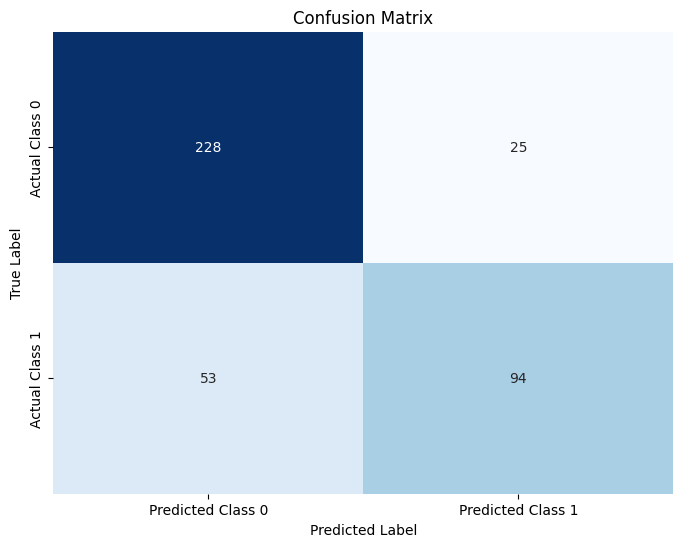

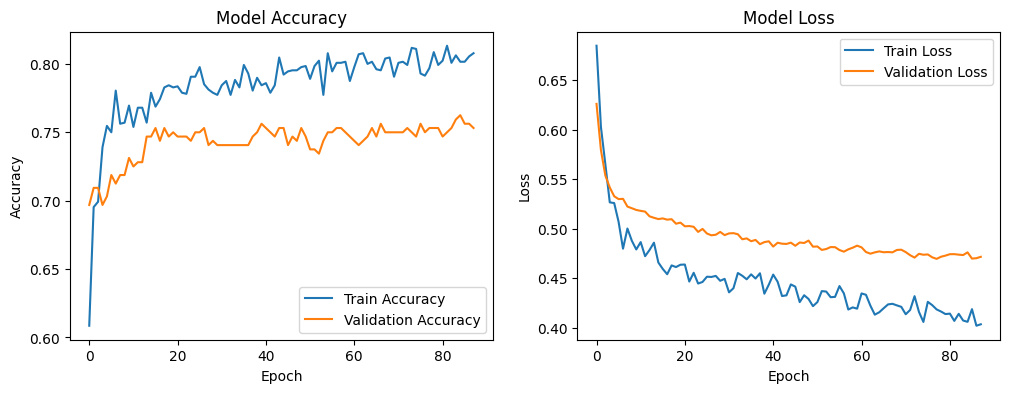

In [21]:
######################################
# Plot training  and accuracy graphs
######################################
import matplotlib.pyplot as plt


# Plot training history graphs
# رسم نمودارهای تاریخچه آموزش
# مصورسازی تاریخچه آموزش مدل
plt.figure(figsize=(12, 4))


# Plot loss graph
# رسم نمودار خطا
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')


# Plot accuracy graph
# رسم نمودار دقت
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()



در نمودار دقت (سمت چپ):
•	دقت آموزش (خط آبی) به صورت پیوسته افزایش یافته و در نهایت به حدود 0.80 رسیده است. این نشان می‌دهد که مدل به خوبی می‌تواند داده‌های آموزشی را یاد بگیرد.
•	دقت اعتبارسنجی (خط نارنجی) نیز افزایش یافته اما در حدود 0.75 ثابت مانده است. این نشان می‌دهد که مدل توانسته است به خوبی روی داده‌های اعتبارسنجی عملکرد خوبی داشته باشد، اما تفاوت بین دقت آموزش و دقت اعتبارسنجی نشان می‌دهد که مدل هنوز به طور کامل به داده‌های جدید تعمیم نیافته است.
در نمودار زیان (سمت راست):
•	زیان آموزش (خط آبی) به صورت پیوسته کاهش یافته و به حدود 0.40 رسیده است. این نشان می‌دهد که مدل به خوبی در حال یادگیری از داده‌های آموزشی است و بهینه سازی می‌شود.
•	زیان اعتبارسنجی (خط نارنجی) نیز کاهش یافته اما به حدود 0.50 ثابت مانده است. این نشان می‌دهد که مدل عملکرد مناسبی روی داده‌های اعتبارسنجی دارد اما هنوز می‌تواند بهتر شود.
نتیجه‌گیری:
1.	مدل به خوبی در حال یادگیری از داده‌های آموزشی است، اما هنوز به طور کامل به داده‌های جدید تعمیم نیافته است.
2.	نیاز به بررسی بیشتر و شاید تنظیمات بهتر مدل مانند کاهش نرخ یادگیری یا استفاده از تکنیک‌های داده‌افزایی (data augmentation) وجود دارد تا عملکرد مدل روی داده‌های جدید بهبود یابد.


In [ ]:
######################################
# visualize your model in this place
######################################

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_first_pro_shuffle_Dropout.png', show_shapes=True, show_layer_names=True)

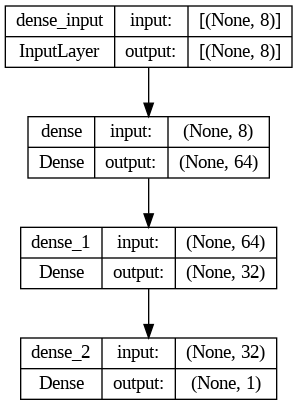

In [22]:
######################################
# create Classification Report in this place
######################################
from sklearn.metrics import classification_report

# Display classification report
# نمایش گزارش طبقه‌بندی
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       253
           1       0.79      0.64      0.71       147

    accuracy                           0.81       400
   macro avg       0.80      0.77      0.78       400
weighted avg       0.80      0.81      0.80       400



In [23]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    # taghir:
    x = sc.transform(x)

    # taghir
    prediction = model.predict(x)
    return prediction[0][0]

    #return ########################### return  your calssifier

In [24]:
# Prediction 1 // this sample didnt have fatty liver
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
# taghir
sample = [2, 81, 72, 15, 76, 30.1, 0.547, 25]                   # output: 0 ==> Great! You don't have fatty liver.
# tagir:
sample_2 = [2,	138,	62,	35,	0,	33.6,	0.127,	47]             # output: 1 ==> Oops! You have fatty liver.
# tagir:
sample_3 = [0,	84,	82,	31,	125,	38.2,	0.233,	23]             # output: 0 ==> Great! You don't have fatty liver.


prediction = predict_diabetes(*sample)
prediction_2 = predict_diabetes(*sample_2)
prediction_3 = predict_diabetes(*sample_3)
# prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction > 0.5:
  print('Oops! You have fatty liver.')
else:
  print("Great! You don't have fatty liver.")


if prediction_2 > 0.5:
      print('Oops! You have fatty liver.')
else:
  print("Great! You don't have fatty liver.")


if prediction_3 > 0.5:
      print('Oops! You have fatty liver.')
else:
  print("Great! You don't have fatty liver.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Maleki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Great! You don't have fatty liver.
Oops! You have fatty liver.
Great! You don't have fatty liver.
